In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

import numpy as np
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
input_shape = (32, 32, 1)

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [12]:
#Lenet 5

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)),
tf.keras.layers.AveragePooling2D(),

tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.AveragePooling2D(),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(units=120, activation='relu'),

tf.keras.layers.Dense(units=84, activation='relu'),

tf.keras.layers.Dense(units=10, activation = 'softmax')
]);

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [13]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 1

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_accuracy") is not None and logs.get("val_accuracy") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True
            
callbacks = myCallback()

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

validation_datagen = ImageDataGenerator(1./255)
val_dir = r"test"
new_val = validation_datagen.flow_from_directory(val_dir, #directory containing various fruits
                                                target_size=(32, 32), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="sparse",
                                                color_mode="grayscale")

with tf.device('/gpu:0'):
    my_model = model.fit(x=x_train,y=y_train, epochs=10, validation_data=(new_val), verbose=1, 
                                  callbacks = [callbacks], workers=10)

Found 60 images belonging to 10 classes.
Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9956

c:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 562.4510 - val_accuracy: 0.5000
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - 15s 8ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 870.0955 - val_accuracy: 0.4833
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 692.6804 - val_accuracy: 0.4833
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 921.3200 - val_accuracy: 0.4167
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 826.0331 - val_accuracy: 0.4333
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 882.5161 - val_accuracy: 0.4667
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0074 -

In [15]:
with tf.device('/gpu:0'):
    my_model = model.fit(x=x_train,y=y_train, epochs=10, validation_data=(x_test, y_test), verbose=1, 
                                  callbacks = [callbacks], workers=10)

Epoch 1/10
   5/1875 [..............................] - ETA: 30s - loss: 2.2803 - accuracy: 0.1688  WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0048s vs `on_train_batch_end` time: 0.0108s). Check your callbacks.


1875/1875 [==============================] - 15s 8ms/step - loss: 0.2141 - accuracy: 0.9361 - val_loss: 0.0843 - val_accuracy: 0.9731
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0781 - accuracy: 0.9758 - val_loss: 0.0586 - val_accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.0617 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0384 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0248 - accuracy: 0.9918 - val_loss: 0.0372 - val_accuracy: 0

In [21]:
filename = "model10"
filepath = r"model10"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save(filename+".h5")

# Convert the model.
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(filename+'.h5')
tflite_model = converter.convert()

# Save the model.
with open(filename+'.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: model10\assets


INFO:tensorflow:Assets written to: model10\assets


INFO:tensorflow:Assets written to: C:\Users\hanna\AppData\Local\Temp\tmp2r2b6htf\assets


INFO:tensorflow:Assets written to: C:\Users\hanna\AppData\Local\Temp\tmp2r2b6htf\assets


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmp2r2b6htf\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmp2r2b6htf\variables\variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_2_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_2_input


INFO:tensorflow: tensor name: serving_default_conv2d_2_input:0, shape: (-1, 32, 32, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_conv2d_2_input:0, shape: (-1, 32, 32, 1), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_5


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_5


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 10), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 10), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmp2r2b6htf\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmp2r2b6htf\variables\variables


In [22]:
  historyFileName = "hist10"
  with open(historyFileName+".txt",'w') as f:
    for k in my_model.history.keys():
        print(k,file=f)
        for i in my_model.history[k]:
            print(i,file=f)

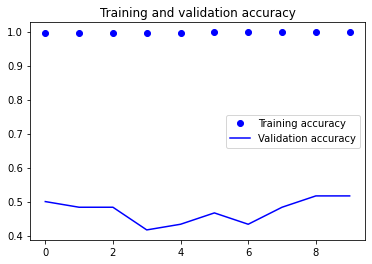

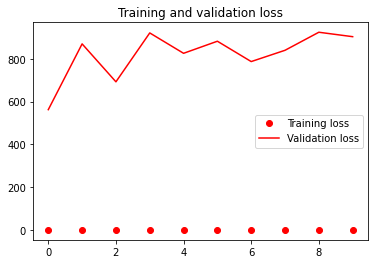

In [23]:
acc = my_model.history['accuracy'] #training accuracy scores from the model that has been trained
val_acc = my_model.history['val_accuracy'] #validation accuracy scores from the model that has been trained
loss = my_model.history['loss'] #training loss scores from the model that has been trained
val_loss = my_model.history['val_loss'] #validation loss scores from the model that has been trained

epochs = range(len(acc)) #x axis

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()